<a href="https://colab.research.google.com/github/amitpuri/openagi-codes/blob/main/notebooks/Recurrent_Neural_Network_RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install keras-tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 3.1 MB/s eta 0:00:00


Trial 5 Complete [00h 00m 05s]
val_accuracy: 0.5550000071525574

Best val_accuracy So Far: 0.574999988079071
Total elapsed time: 00h 00m 28s
Best Hyperparameters: {'units1': 20, 'units2': 50}
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.5284 - loss: 0.6901 - val_accuracy: 0.5050 - val_loss: 0.6914
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6099 - loss: 0.6722 - val_accuracy: 0.5100 - val_loss: 0.6934
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5663 - loss: 0.6761 - val_accuracy: 0.5200 - val_loss: 0.6916
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6083 - loss: 0.6718 - val_accuracy: 0.5350 - val_loss: 0.6927
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6071 - loss: 0.6637 - val_accuracy: 0.5250 - val_loss: 0.6951
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6145 - loss: 0.6579 - val_accuracy: 0.5700 - val_loss: 0.6911
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6102 - loss: 0.6608 - val_accuracy: 0.5200 - val_loss: 0.7047
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6180 - loss: 0.6541 - val_accuracy: 0.5500 - val_loss: 0.6940
Ep

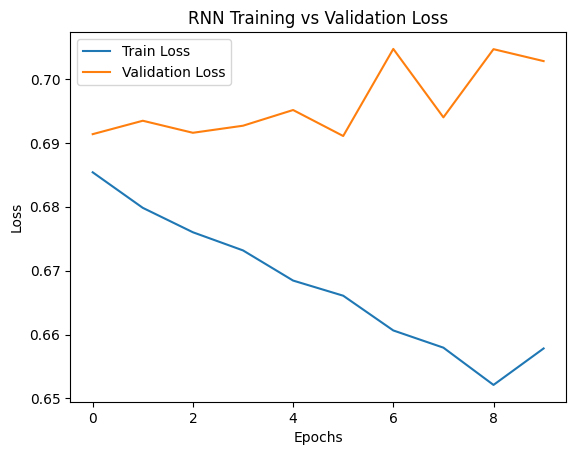

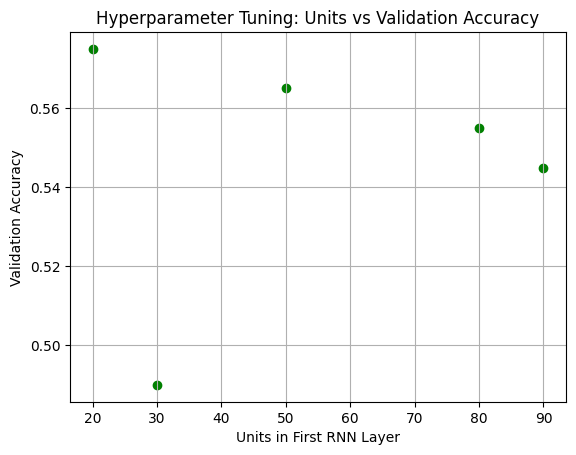

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
import keras_tuner as kt

# Generate synthetic sequential data
num_samples = 1000
timesteps = 10
input_dim = 1
X = np.random.rand(num_samples, timesteps, input_dim)
y = np.random.randint(2, size=(num_samples, 1))

# Define model builder function for hyperparameter tuning
def build_rnn_model(hp):
    model = Sequential()
    # Tune number of units in first RNN layer: 20 to 100 in steps of 10
    units1 = hp.Int('units1', min_value=20, max_value=100, step=10)
    model.add(SimpleRNN(units=units1, activation='relu', return_sequences=True, input_shape=(timesteps, input_dim)))
    # Optionally tune second RNN layer units (fixed here for simplicity)
    units2 = hp.Int('units2', min_value=10, max_value=50, step=5)
    model.add(SimpleRNN(units=units2, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Set up Keras Tuner RandomSearch
tuner = kt.RandomSearch(
    build_rnn_model,
    objective='val_accuracy',
    max_trials=5,
    executions_per_trial=1,
    directory='rnn_tuning',
    project_name='rnn_hyperparam'
)

# Run the hyperparameter search (using 20% of data for validation)
tuner.search(X, y, epochs=10, batch_size=32, validation_split=0.2)

# Get the best model and hyperparameters
best_model = tuner.get_best_models(num_models=1)[0]
best_hp = tuner.get_best_hyperparameters(num_trials=1)[0]
print("Best Hyperparameters:", best_hp.values)

# Evaluate the best model
history = best_model.fit(X, y, epochs=10, batch_size=32, validation_split=0.2)
loss, accuracy = best_model.evaluate(X, y)
print("Best RNN Accuracy:", accuracy)

# Plot training and validation loss curves
plt.figure()
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("RNN Training vs Validation Loss")
plt.legend()
plt.show()

# Extract hyperparameter tuning results for visualization
trials = tuner.oracle.get_best_trials(num_trials=len(tuner.oracle.trials))
units1_vals = []
val_accuracies = []
for trial in trials:  # Iterate directly over the trials list
    units1_vals.append(trial.hyperparameters.get('units1'))
    val_acc = trial.metrics.get_last_value('val_accuracy')
    val_accuracies.append(val_acc)
plt.figure()
plt.scatter(units1_vals, val_accuracies, color='green')
plt.xlabel("Units in First RNN Layer")
plt.ylabel("Validation Accuracy")
plt.title("Hyperparameter Tuning: Units vs Validation Accuracy")
plt.grid(True)
plt.show()
